In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3
import ipywidgets as widget
from IPython.core.display import display, HTML
%matplotlib inline

conn = sqlite3.connect('/home/jelmert/Documents/decide-kopenhagen-no-ties.db')



In [2]:
cursor = conn.execute('SELECT `name`, `id` FROM actor ORDER BY `name`')
actors = cursor.fetchall()

# for actor, actor_id in actors:
df = pd.read_sql_query("""
        SELECT COUNT(*)/1000 exchanges_count, SUM(ea.eu)/1000 utility_sum, AVG(ea.eu) utility_avg, a.name as actor, m.p FROM exchangeactor ea
          JOIN actor a on ea.actor_id = a.id
          JOIN exchange e on ea.id = e.i_id
          JOIN iteration i on e.iteration_id = i.id
          JOIN repetition r on i.repetition_id = r.id
          JOIN modelrun m on r.model_run_id = m.id
          GROUP BY a.id, m.p;
        """, 
                         conn,                          
                         index_col=['actor', 'p'],                 
                        )
    

In [3]:
df_exchanges_count = pd.pivot_table(df, index=['p'], columns=['actor'], values=['exchanges_count'])
df_exchanges_count

exchanges_count                                                
actor       Australia Brazil Canada EU (incl Norway) Japan Russia USA
p                                                                    
0.00               22     10     26               38    27     11  34
0.05               21     10     27               36    26     10  34
0.15               21     10     27               36    26     10  34
0.20               21     10     27               36    26     11  34
0.25               21     10     27               36    26     11  35
0.30               21     10     26               35    26     11  35
0.35               21     10     26               35    26     11  35
0.40               21     10     26               35    26     11  36
0.45               21     10     26               35    26     11  36
0.50               21     10     26               35    26     11  36
0.55               21     10     26               35    26     11  36
0.60               21     10     26               35    26     11  36
0.65               21     10     26               35    26     11  36
0.70               21     10     26               35    26     11  36
0.75               21     11     26               35    26     11  36
0.80               21     11     26               35    26     11  36
0.85               21     11     26               35    26     11  36
0.90               21     11     25               35    26     11  36
1.00               21     11     26               35    26     11  36

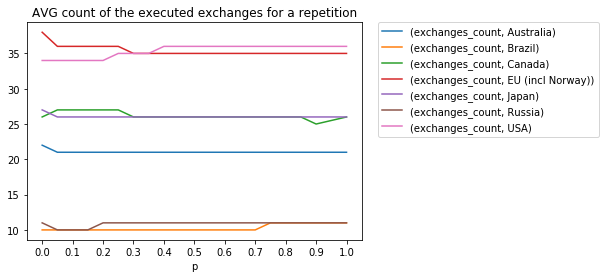

In [4]:
plt = df_exchanges_count.plot()

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG count of the executed exchanges for a repetition')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [5]:
pd_utility_sum = pd.pivot_table(df, index=['p'], columns=['actor'], values=['utility_sum'])
pd_utility_sum

utility_sum                                                           \
actor   Australia    Brazil    Canada EU (incl Norway)     Japan    Russia   
p                                                                            
0.00     0.569838  1.354359  2.001915        10.388760  1.208533  0.303050   
0.05     0.571363  1.389741  2.200931        10.454752  1.188747  0.308628   
0.15     0.573189  1.464224  2.271043        10.808333  1.197543  0.312411   
0.20     0.565927  1.502833  2.319174        10.908469  1.216171  0.327179   
0.25     0.566040  1.542710  2.375222        11.002174  1.247833  0.342457   
0.30     0.572428  1.573771  2.413676        11.203574  1.273101  0.351054   
0.35     0.579615  1.612365  2.483981        11.383221  1.297353  0.357085   
0.40     0.590669  1.666153  2.554162        11.532623  1.336692  0.365795   
0.45     0.602657  1.686271  2.615928        11.823502  1.366054  0.374733   
0.50     0.612065  1.737520  2.683918        12.122630  1.399239  0.381789   
0.55     0.633587  1.754112  2.753959        12.288538  1.449747  0.381626   
0.60     0.647006  1.796352  2.804496        12.606611  1.489259  0.389388   
0.65     0.660795  1.834663  2.887737        12.781477  1.540464  0.393964   
0.70     0.666096  1.877625  2.969692        12.941028  1.568175  0.395861   
0.75     0.678414  1.909927  3.065277        13.324071  1.596064  0.403453   
0.80     0.695125  1.928447  3.121277        13.531275  1.638794  0.405424   
0.85     0.709652  1.980352  3.175834        13.876934  1.689848  0.407668   
0.90     0.730713  2.018798  3.259382        14.184057  1.723223  0.412743   
1.00     0.759036  2.072105  3.414149        14.576306  1.829492  0.419577   

                 
actor       USA  
p                
0.00   5.957285  
0.05   5.939004  
0.15   6.028779  
0.20   6.072731  
0.25   6.149691  
0.30   6.212960  
0.35   6.259759  
0.40   6.289255  
0.45   6.359210  
0.50   6.362076  
0.55   6.380177  
0.60   6.380101  
0.65   6.456293  
0.70   6.507639  
0.75   6.468269  
0.80   6.550042  
0.85   6.555868  
0.90   6.594540  
1.00   6.605235

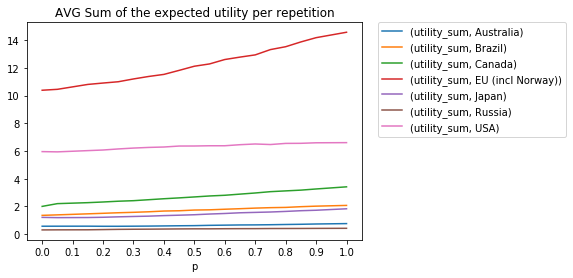

In [10]:
plt = pd_utility_sum.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG Sum of the expected utility per repetition')
plt.set_xticks([x*0.10 for x in range(11)])
plt

In [7]:
pd_utility_avg = pd.pivot_table(df, index=['p'], columns=['actor'], values=['utility_avg'])
pd_utility_avg



utility_avg                                                           \
actor   Australia    Brazil    Canada EU (incl Norway)     Japan    Russia   
p                                                                            
0.00     0.025902  0.135436  0.076997         0.273388  0.044760  0.027550   
0.05     0.026010  0.138877  0.081191         0.289565  0.044039  0.029185   
0.15     0.026113  0.143228  0.082526         0.297857  0.044795  0.029307   
0.20     0.025934  0.144503  0.085020         0.301739  0.045369  0.029690   
0.25     0.026064  0.145511  0.087257         0.305463  0.046617  0.030628   
0.30     0.026427  0.147274  0.089448         0.311877  0.047598  0.031122   
0.35     0.026772  0.149778  0.092122         0.317196  0.048599  0.031567   
0.40     0.027350  0.153435  0.095827         0.322176  0.050092  0.031942   
0.45     0.027956  0.154903  0.098699         0.331246  0.051234  0.032716   
0.50     0.028436  0.158823  0.102171         0.340485  0.052520  0.033214   
0.55     0.029394  0.160237  0.104412         0.344671  0.054494  0.033441   
0.60     0.030042  0.163931  0.107288         0.354078  0.056019  0.033981   
0.65     0.030690  0.167335  0.110232         0.358456  0.057893  0.034410   
0.70     0.030965  0.171004  0.113179         0.363522  0.058837  0.034483   
0.75     0.031578  0.173393  0.117597         0.374893  0.059910  0.035120   
0.80     0.032343  0.174932  0.119424         0.382175  0.061500  0.035138   
0.85     0.033045  0.179428  0.121768         0.391021  0.063421  0.035345   
0.90     0.034010  0.182449  0.125414         0.401156  0.064642  0.036041   
1.00     0.035362  0.187199  0.130926         0.411446  0.068492  0.036406   

                 
actor       USA  
p                
0.00   0.175214  
0.05   0.173716  
0.15   0.175982  
0.20   0.173899  
0.25   0.173617  
0.30   0.173721  
0.35   0.174527  
0.40   0.173717  
0.45   0.174771  
0.50   0.173377  
0.55   0.174910  
0.60   0.174044  
0.65   0.176532  
0.70   0.177354  
0.75   0.175620  
0.80   0.177421  
0.85   0.178192  
0.90   0.178289  
1.00   0.179573

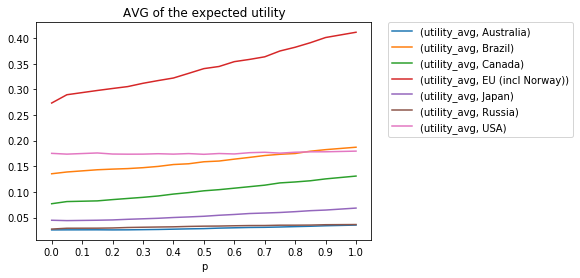

In [8]:
plt = pd_utility_avg.plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.set_title('AVG of the expected utility')
plt.set_xticks([x*0.10 for x in range(11)])
plt